In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [81]:
df = pd.read_csv('placement.csv')
df.count()

cgpa       200
package    200
dtype: int64

In [7]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

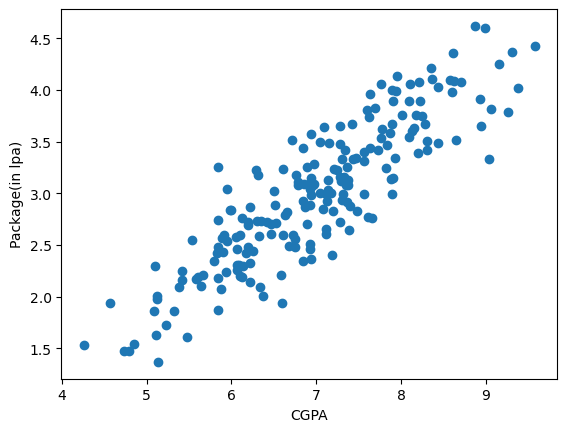

In [11]:
plt.scatter(df["cgpa"], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [21]:
# dividing dependent and independent feature
x= df.iloc[:, 0:1]
y= df.iloc[:, -1]

In [15]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [17]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [24]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

- If you don't specify a random_state, the splitting process will randomly shuffle and divide the data every time you run the code.
The resulting training and testing sets will be different each time.
- Specifying a random_state (like random_state=2) ensures that the randomness is controlled and the same data split is produced every time you run the code.

In [26]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [32]:
# Model train
lr.fit(X_train, Y_train) # method to train model

LinearRegression()

In [34]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [36]:
Y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

- .values:
Converts the Series into a NumPy array.

In [51]:
# Testing /Predicting
lr.predict(X_test.iloc[2].values.reshape(1, 1))
# reshape because the model expects data in rows and columns and it is scalar


C:\Users\CHETNAGURURANI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.38464568])

Text(0, 0.5, 'Package(in lpa)')

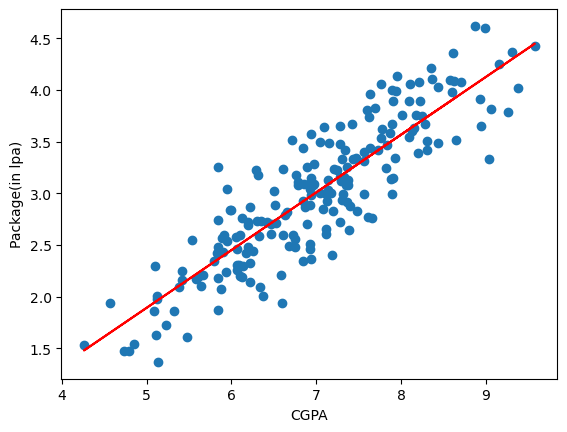

In [55]:
plt.scatter(df["cgpa"], df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [57]:
# slop and intersept value

In [73]:
m= lr.coef_ 
m # slope

array([0.55795197])

In [83]:
b= lr.intercept_
b # intercept

-0.8961119222429144

In [69]:
# y= mx +c

In [79]:
m* 8.58 +b

65.03164778491289

In [77]:
m * 9.5 +b

72.1008248164494

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

In [87]:
Y_pred=lr.predict(X_test)

In [89]:
Y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [93]:
print("MAE", mean_absolute_error(Y_test, Y_pred))

MAE 0.2884710931878175


In [95]:
print("MSE", mean_squared_error(Y_test, Y_pred))

MSE 0.12129235313495527


In [99]:
print("RMSE", np.sqrt(mean_squared_error(Y_test, Y_pred)))

RMSE 0.34827051717731616


In [101]:
print("MSE", r2_score(Y_test, Y_pred))

MSE 0.780730147510384


In [109]:
r2= r2_score(Y_test, Y_pred)
# Adjusted R2 score

In [105]:
X_test.shape

(40, 1)

In [111]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [124]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)
new_df1 = new_df1[['cgpa','random_feature', 'package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.955050,3.26
1,5.12,0.287206,1.98
2,7.82,0.742873,3.25
3,7.42,0.510691,3.67
4,6.94,0.109750,3.57


Text(0, 0.5, 'package')

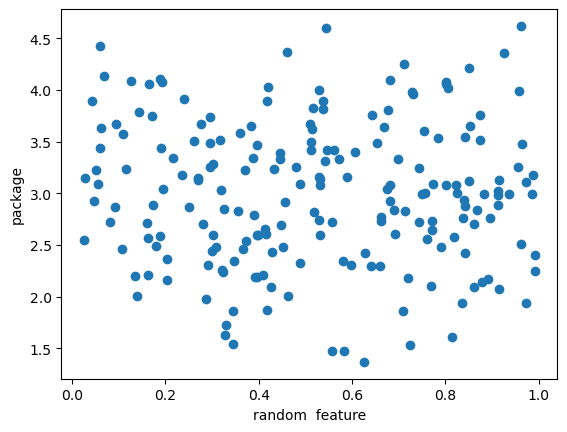

In [128]:
plt.scatter(new_df1['random_feature'], new_df1["package"])
plt.xlabel("random  feature")
plt.ylabel("package")

In [132]:
X = new_df1.iloc[:, 0:2]
Y = new_df1.iloc[:, 2]

In [136]:
X_train , X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state= 2)


In [154]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [156]:
lr.fit(X_train, Y_train)

LinearRegression()

In [162]:
print("R2 score", r2_score(Y_test, Y_pred))
r2=  r2_score(Y_test, Y_pred)

R2 score 0.780730147510384


In [164]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415